### Se trabaja con una Regresion con un Dataset clasico de datos de práctica de regresión proviene originalmente del paquete DAAG R (conjuntos de datos utilizados en ejemplos y ejercicios del libro Maindonald, J. H. y Braun, W. J. (2003, 2007, 2010) "Análisis de datos y gráficos con R").

## Proposito:
### ¿Podemos predecir la longitud total con las demas variables?
### ¿Qué dimensiones corporales de la zarigüeya están más correlacionadas con la edad y el sexo?
### ¿Podemos clasificar el sexo de una zarigüeya por las dimensiones de su cuerpo y su ubicación?


## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import matplotlib
import seaborn as sns
from scipy.stats import shapiro
import pylab

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as smf
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Get the Dataset with Kaggle API

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abrambeyer/openintro-possum")

print("Path to dataset files:", path)

100%|██████████| 2.15k/2.15k [00:00<00:00, 2.99MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abrambeyer/openintro-possum/versions/1


### List the downloaded files

In [ ]:
import os


print("Archivos en el dataset:", os.listdir(path))


Archivos en el dataset: ['possum.csv']


### Dataset Access

In [ ]:
# Accedo al dataset
file_path = os.path.join(path, "possum.csv")  # Ajusta el nombre según el archivo real
df = pd.read_csv(file_path)

# Mostrar las primeras filas
display(df.head())


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


### Dataset EDA

In [ ]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [ ]:
df.shape

(104, 14)

In [ ]:
#Null Ckeck
df.isnull().sum()

,0
case,0
site,0
Pop,0
sex,0
age,2
hdlngth,0
skullw,0
totlngth,0
taill,0
footlgth,1


In [ ]:
# Nulls in the column 'age'
nulls1= df[df['age'].isnull()]
display(nulls1)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
43,44,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
45,46,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


In [ ]:
#Nulls un the columna 'footlgth'
nulls2=df[df['footlgth'].isnull()]
display(nulls2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
40,41,2,Vic,f,5.0,88.4,57.0,83.0,36.5,NaN,40.3,15.9,27.0,30.5


In [ ]:
#Dispose of de nulls rows
df.dropna(inplace=True)

In [ ]:
#descriptive statistics
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,52.762376,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,30.573894,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,26.000000,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,54.000000,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,79.000000,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


# Categorical features check

In [ ]:
df['Pop'].value_counts()

,count
Pop,
other,58
Vic,43


<Axes: ylabel='Pop'>

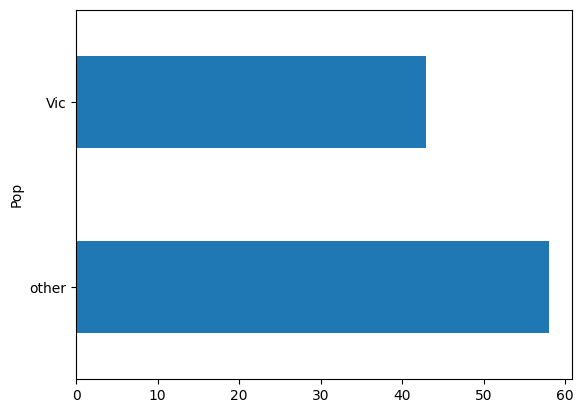

In [ ]:
df['Pop'].value_counts().plot(kind='barh')

# **There is much more samples taken en others places that taken in Victoria(Vic)**

In [ ]:
df['sex'].value_counts()

,count
sex,
m,59
f,42


<Axes: ylabel='sex'>

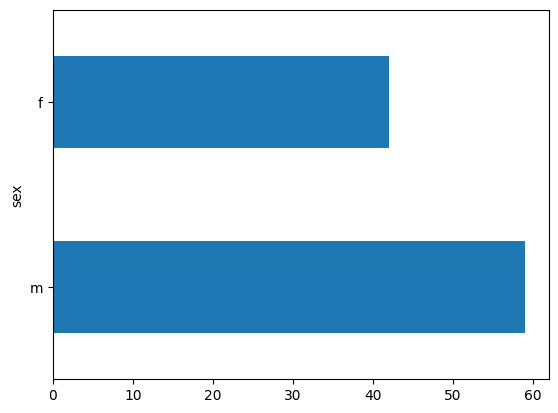

In [ ]:
df['sex'].value_counts().plot(kind='barh')

# **There is more males than females in the sample**

# I separate categorical variables from numerical ones

In [ ]:
## function to get numerical and categorical features
def feature_selector(dataframe):
    cat_features = [feature for feature in dataframe.columns if df[feature].dtype=='O']
    num_features = [feature for feature in dataframe.columns if df[feature].dtype!='O']
    return cat_features, num_features

In [ ]:
cat, num = feature_selector(df)

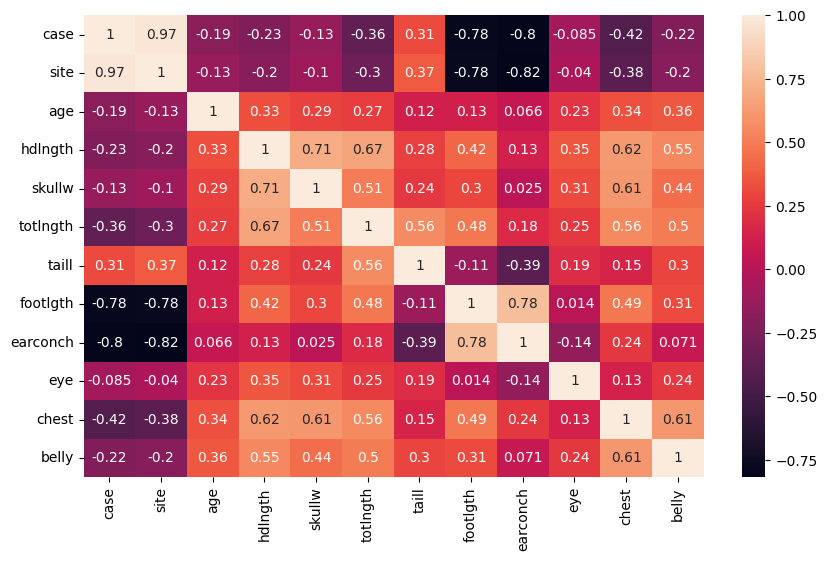

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num].corr(), annot=True)
plt.show()

# I generate de correlation matrix

In [ ]:
corr_matrix = df[num].corr()
corr_matrix

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.972590,-0.192688,-0.227342,-0.134138,-0.361924,0.313060,-0.784031,-0.798400,-0.084774,-0.422289,-0.224667
site,0.972590,1.000000,-0.127688,-0.195820,-0.103363,-0.304642,0.372065,-0.781489,-0.818580,-0.040443,-0.380269,-0.195044
age,-0.192688,-0.127688,1.000000,0.329505,0.285563,0.268297,0.120205,0.126190,0.066234,0.231857,0.335030,0.360816
hdlngth,-0.227342,-0.195820,0.329505,1.000000,0.705901,0.670402,0.275155,0.415945,0.131576,0.354688,0.621068,0.545438
skullw,-0.134138,-0.103363,0.285563,0.705901,1.000000,0.506382,0.241027,0.297197,0.025293,0.314319,0.613842,0.444216
totlngth,-0.361924,-0.304642,0.268297,0.670402,0.506382,1.000000,0.563586,0.483174,0.181230,0.247150,0.556094,0.500558
taill,0.313060,0.372065,0.120205,0.275155,0.241027,0.563586,1.000000,-0.114560,-0.387871,0.192341,0.152924,0.296206
footlgth,-0.784031,-0.781489,0.126190,0.415945,0.297197,0.483174,-0.114560,1.000000,0.782415,0.013869,0.486477,0.311970
earconch,-0.798400,-0.818580,0.066234,0.131576,0.025293,0.181230,-0.387871,0.782415,1.000000,-0.143869,0.241359,0.071309
eye,-0.084774,-0.040443,0.231857,0.354688,0.314319,0.247150,0.192341,0.013869,-0.143869,1.000000,0.134730,0.242902


# We hace correlations <br>

### **skullw → Skull Width → Ancho del cráneo**
### **hdlngth → Head Length → Longitud de la cabeza**
### **totlngth → Total lenght → Largo Total**
### **hdlngth → Total lenght → Largo de la cabeza**


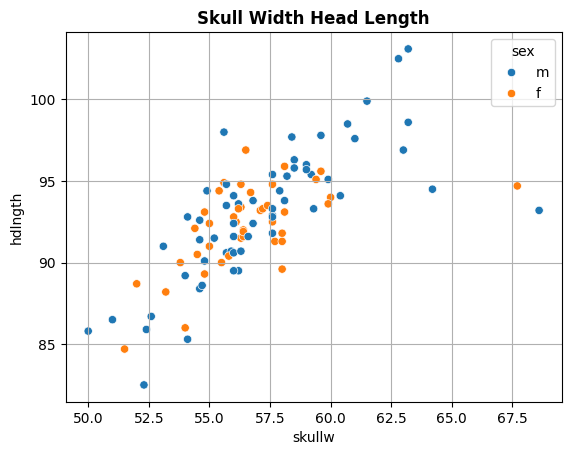

In [ ]:
# I graph
sns.scatterplot(data=df, x='skullw', y='hdlngth',hue='sex') #I take both features and y related them with de categorical features 'sex'
plt.grid()
plt.title('Skull Width Head Length',fontweight='bold')
plt.show()

##**It seems to have normal distribution of data**

## **Graph the other possible correlation**

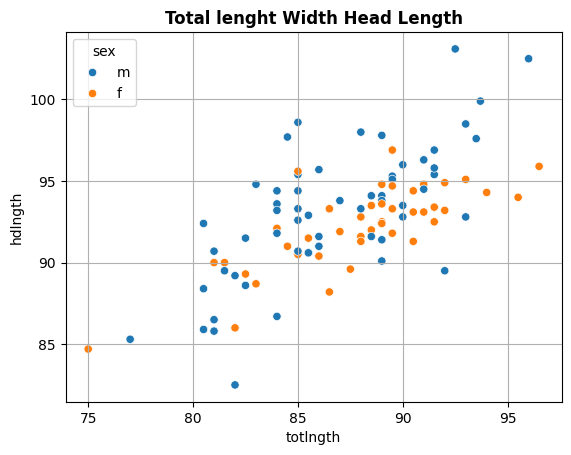

In [ ]:
# I graph
sns.scatterplot(data=df, x='totlngth', y='hdlngth',hue='sex') #I take both features and y related them with de categorical features 'sex'
plt.grid()
plt.title('Total lenght Width Head Length',fontweight='bold')
plt.show()

## **There is more data dispersion**

# Regression with Sklearn

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 92 to 54
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      80 non-null     int64  
 1   site      80 non-null     int64  
 2   Pop       80 non-null     object 
 3   sex       80 non-null     object 
 4   age       80 non-null     float64
 5   hdlngth   80 non-null     float64
 6   skullw    80 non-null     float64
 7   totlngth  80 non-null     float64
 8   taill     80 non-null     float64
 9   footlgth  80 non-null     float64
 10  earconch  80 non-null     float64
 11  eye       80 non-null     float64
 12  chest     80 non-null     float64
 13  belly     80 non-null     float64
dtypes: float64(10), int64(2), object(2)
memory usage: 9.4+ KB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 87 to 79
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      21 non-null     int64  
 1   site      21 non-null     int64  
 2   Pop       21 non-null     object 
 3   sex       21 non-null     object 
 4   age       21 non-null     float64
 5   hdlngth   21 non-null     float64
 6   skullw    21 non-null     float64
 7   totlngth  21 non-null     float64
 8   taill     21 non-null     float64
 9   footlgth  21 non-null     float64
 10  earconch  21 non-null     float64
 11  eye       21 non-null     float64
 12  chest     21 non-null     float64
 13  belly     21 non-null     float64
dtypes: float64(10), int64(2), object(2)
memory usage: 2.5+ KB


<Axes: >

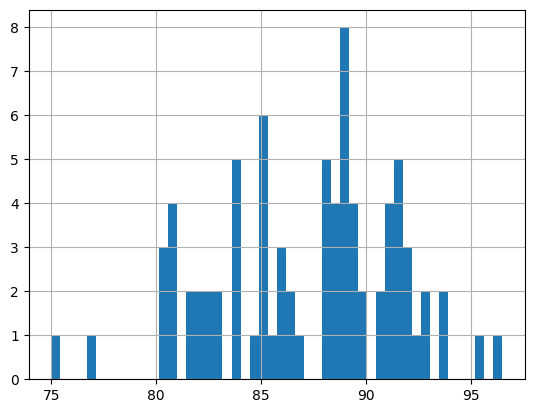

In [ ]:
#Check the feature to predict ('y') on the training set
train_set['totlngth'].hist(bins=50)

<Axes: >

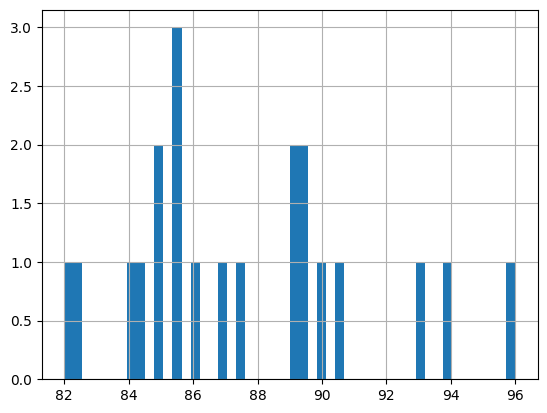

In [ ]:
#Check the same feature on the test set ('y')
test_set['totlngth'].hist(bins=50)

## Tambien podriamos ver si una transformacion logaritimica cambia (corrige) la distribucion de la variable

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def apply_log(column, scaling=True):
  data = column
  if scaling:
    scaler = MinMaxScaler() # Primero aplicamos escalado al rango [0,1]
    data = scaler.fit_transform(column.values.reshape(-1, 1))

  log_variable = np.log(data+1)

  return pd.DataFrame(log_variable, columns=[column.name])

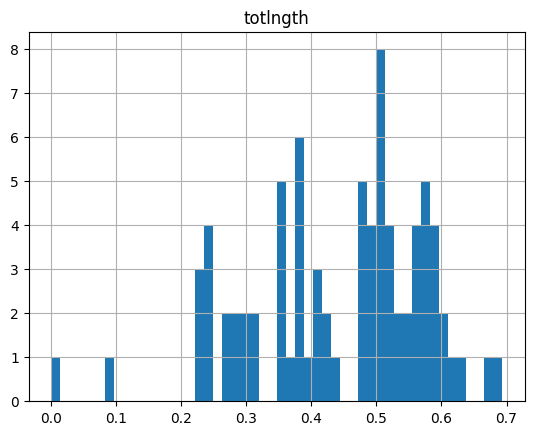

In [ ]:
log_col = apply_log(train_set['totlngth']) #Aplico la funcion logaritmica para comprobar si se corrige la distribucion
log_col.hist(bins=50)
plt.show()

# Vemos la dsitribucion de las features del training set

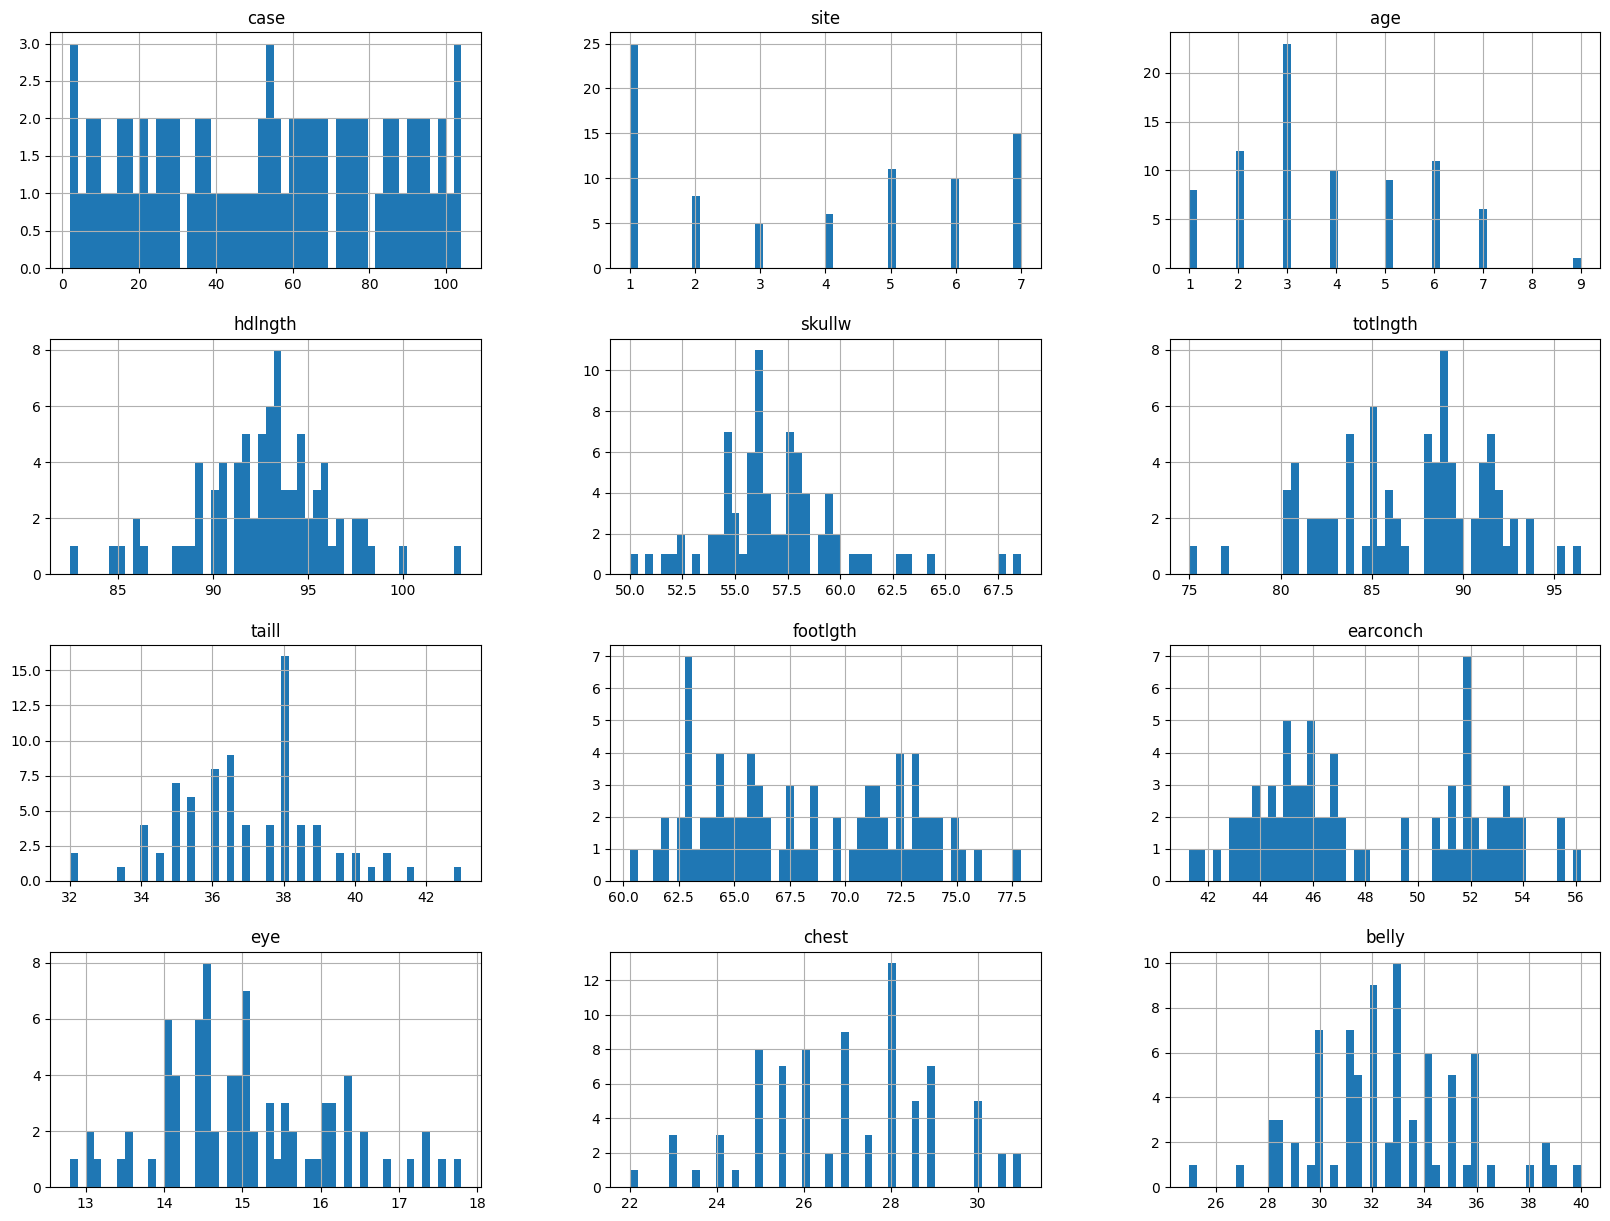

In [ ]:
train_set.hist(bins=50,figsize=(20,15))
plt.show()

# **Most features seems to have a Gaussian Distribución**

# Generate the correlation matrix

In [ ]:
train_set.info()  #I identify de categorical features to discard them

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 92 to 54
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      80 non-null     int64  
 1   site      80 non-null     int64  
 2   Pop       80 non-null     object 
 3   sex       80 non-null     object 
 4   age       80 non-null     float64
 5   hdlngth   80 non-null     float64
 6   skullw    80 non-null     float64
 7   totlngth  80 non-null     float64
 8   taill     80 non-null     float64
 9   footlgth  80 non-null     float64
 10  earconch  80 non-null     float64
 11  eye       80 non-null     float64
 12  chest     80 non-null     float64
 13  belly     80 non-null     float64
dtypes: float64(10), int64(2), object(2)
memory usage: 9.4+ KB


In [ ]:
#drop de categorical features
train_set.drop('Pop',axis=1,inplace=True)
train_set.drop('sex',axis=1,inplace=True)
train_set

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
92,93,7,3.0,89.2,54.0,82.0,38.0,63.8,44.9,12.8,24.0,31.0
26,27,1,2.0,90.5,54.5,85.0,35.0,70.3,50.8,14.2,23.0,28.0
44,45,2,3.0,90.7,55.9,81.0,34.0,71.5,54.0,14.6,27.0,31.5
73,74,6,4.0,88.7,52.0,83.0,38.0,61.5,45.9,14.7,26.0,34.0
15,16,1,4.0,91.6,56.0,86.0,34.5,73.0,51.4,14.4,28.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63,64,5,3.0,96.9,56.5,89.5,38.5,63.0,45.1,17.1,25.5,33.0
74,75,6,6.0,93.8,58.1,89.0,38.0,66.2,45.6,16.9,26.0,33.5
14,15,1,5.0,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0
95,96,7,4.0,94.8,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0


In [ ]:
corr_matrix=train_set.corr()
corr_matrix

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.973048,-0.110615,-0.178978,-0.094398,-0.349935,0.289394,-0.772276,-0.796360,-0.092706,-0.393439,-0.242901
site,0.973048,1.000000,-0.046866,-0.130628,-0.068108,-0.267903,0.365097,-0.768002,-0.818831,-0.050642,-0.341388,-0.213369
age,-0.110615,-0.046866,1.000000,0.347551,0.276007,0.275483,0.166658,0.047406,0.035049,0.292511,0.305047,0.349550
hdlngth,-0.178978,-0.130628,0.347551,1.000000,0.678357,0.676976,0.345595,0.386142,0.139525,0.395103,0.586606,0.551676
skullw,-0.094398,-0.068108,0.276007,0.678357,1.000000,0.535062,0.305088,0.281423,0.056940,0.293109,0.611577,0.416712
totlngth,-0.349935,-0.267903,0.275483,0.676976,0.535062,1.000000,0.605735,0.462661,0.156541,0.307422,0.551681,0.531211
taill,0.289394,0.365097,0.166658,0.345595,0.305088,0.605735,1.000000,-0.121525,-0.390724,0.280488,0.158667,0.311504
footlgth,-0.772276,-0.768002,0.047406,0.386142,0.281423,0.462661,-0.121525,1.000000,0.797768,0.035111,0.436678,0.336188
earconch,-0.796360,-0.818831,0.035049,0.139525,0.056940,0.156541,-0.390724,0.797768,1.000000,-0.114175,0.261640,0.125263
eye,-0.092706,-0.050642,0.292511,0.395103,0.293109,0.307422,0.280488,0.035111,-0.114175,1.000000,0.132989,0.225445


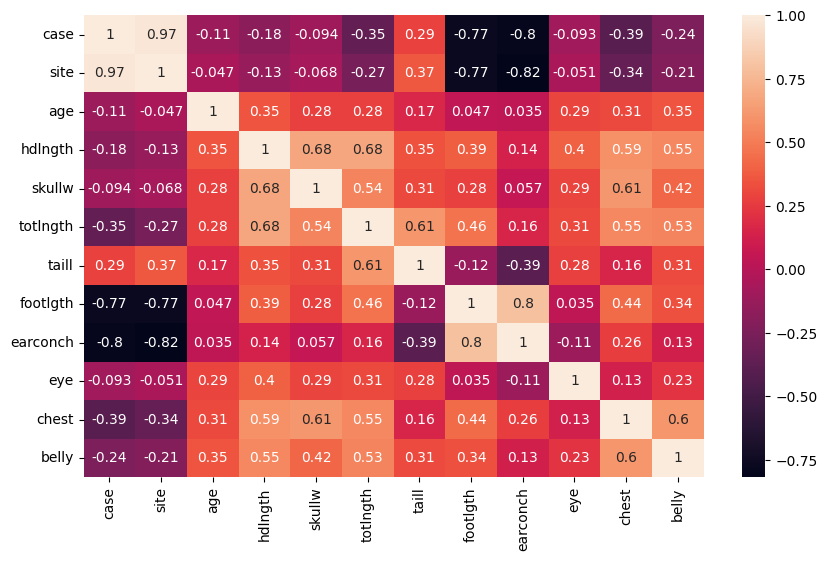

In [ ]:
#Alternative visualization with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_set.corr(), annot=True)
plt.show()

## Tambien podemos analizar el grado de ajuste de una variable, respecto a una distribución normal, haciendo un plot Q-Q.

totlngth - mean: 87.17125 std: 4.331287227907301


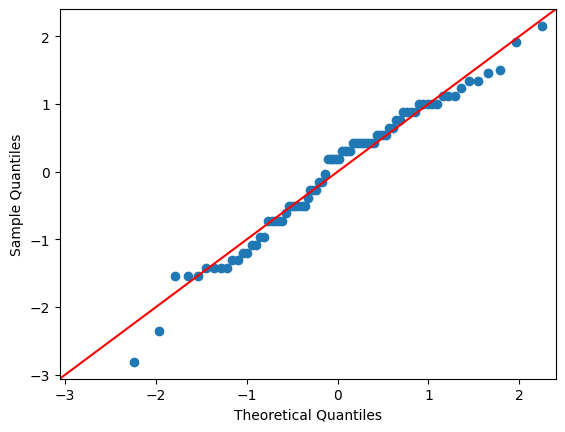

In [ ]:
import statsmodels.api as sm

X = train_set["totlngth"]
print(X.name, "- mean:", X.mean(), "std:", X.std())
X_normed = (X - X.mean())/(X.std()) # Normalización (estandarizacion) de la serie
sm.qqplot(X_normed, line='45')
plt.show()

## To assess the collinearity (dependence) between features, you can compute a correlation matrix or apply the VIF (Variance Inflation Factor). If the VIF > 10, there may be some collinearity; if the VIF > 100, the effect is much stronger.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print('Variance Inflation Factors (VIF)')
print()
# Se calcula el VIF para cada variable
X = train_set.drop([ "totlngth"], axis=1) #.astype('float64')
VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
for idx, vif in enumerate(VIF):
  print('{0}: {1}'.format(train_set.columns[idx], round(vif,2)))

possible_multicollinearity = sum([1 for vif in VIF if (vif > 10)])
print()
print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))

Variance Inflation Factors (VIF)

case: 93.12
site: 90.48
age: 6.97
hdlngth: 1873.21
skullw: 762.34
totlngth: 522.74
taill: 1132.33
footlgth: 524.7
earconch: 262.63
eye: 463.84
chest: 258.43

10 cases of possible multicollinearity


# Model selection and training

In [ ]:
X_train=train_set.drop('totlngth',axis=1) #saco el valor de 'median_house_value' para tenerla como la variable 'y'
# Separamos los valores a predecir (Y)
y_train=train_set['totlngth'].copy() #y dejo todas las demas variables como 'x'
display(y_train)
display(X_train.head())

,totlngth
92,82.0
26,85.0
44,81.0
73,83.0
15,86.0
...,...
63,89.5
74,89.0
14,85.5
95,83.0


,case,site,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
92,93,7,3.0,89.2,54.0,38.0,63.8,44.9,12.8,24.0,31.0
26,27,1,2.0,90.5,54.5,35.0,70.3,50.8,14.2,23.0,28.0
44,45,2,3.0,90.7,55.9,34.0,71.5,54.0,14.6,27.0,31.5
73,74,6,4.0,88.7,52.0,38.0,61.5,45.9,14.7,26.0,34.0
15,16,1,4.0,91.6,56.0,34.5,73.0,51.4,14.4,28.0,32.0


# In multiple regression, it may happen that the data of the predictor variables are on different scales (different numerical variables, thousands, millions, etc.). For these cases, scaling of values ​​in these variables is recommended.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,1.301347,1.381104,-0.427564,-1.032752,-0.945376,0.494427,-1.014756,-0.808506,-2.077969,-1.469600,-0.538197
1,-0.882732,-1.168627,-0.970501,-0.657861,-0.786889,-0.970541,0.484741,0.680432,-0.782131,-1.962547,-1.588336
2,-0.287074,-0.743672,-0.427564,-0.600186,-0.343125,-1.458864,0.761572,1.487991,-0.411891,0.009243,-0.363173
3,0.672597,0.956149,0.115374,-1.176941,-1.579325,0.494427,-1.545347,-0.556143,-0.319332,-0.483705,0.511943
4,-1.246745,-1.168627,0.115374,-0.340646,-0.311427,-1.214702,1.107609,0.831849,-0.597011,0.502190,-0.188150
...,...,...,...,...,...,...,...,...,...,...,...
75,0.341676,0.531194,-0.427564,1.187755,-0.152940,0.738588,-1.199309,-0.758033,1.902105,-0.730178,0.161897
76,0.705689,0.956149,1.201250,0.293785,0.354219,0.494427,-0.461095,-0.631852,1.716985,-0.483705,0.336920
77,-1.279837,-1.168627,0.658312,0.034245,0.195732,-1.458864,0.346326,0.932794,0.606267,0.502190,0.861990
78,1.400623,1.381104,0.115374,0.582162,-0.406520,0.494427,-0.391888,-0.101891,-0.967251,-0.976652,0.161897


# LinearRegression (Sklearn)
## Apply de Model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_train_scaled,y_train)

y_pred=lin_reg.predict(X_train_scaled)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# R2 on the training set

In [ ]:
r2 = r2_score(y_train, y_pred)
print("Train R2=", r2)

Train R2= 0.8073240686152124


## The 80% of de variation its explained by the model

# R2 Adjust

In [ ]:
def r2_adjusted_score(r2, X, y):

  return 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [ ]:
print("Train R2adj=", r2_adjusted_score(r2, X_train, y_train))

Train R2adj= 0.7761559032441439


# RMSE on the training set

In [ ]:
lin_mse = mean_squared_error(y_train, y_pred)
print("Train RMSE=", np.sqrt(lin_mse))

Train RMSE= 1.8892928040961012


## Deviation of the 1.889

# MAE Calculation

In [ ]:
print("Train MAE=", mean_absolute_error(y_train, y_pred))

Train MAE= 1.4656957076679973


# I can calculate de Coefficients to realize de weight related to de 'Y' variable

In [ ]:
cdf = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficients'])
cdf

,Coefficients
case,-2.446672
site,0.497925
age,0.030509
hdlngth,1.380957
skullw,0.263536
taill,2.411815
footlgth,0.785123
earconch,-0.833102
eye,-0.326712
chest,0.141043


#*Interpretation of the coefficient:*<br>

## Every coefficiente indicates the change the **target feature** with the unit increase in the predictor features keeping the other variables constant
<br>

# *Variables with a positive impact (increasing total length)*:<br>

## **tail** (2.411815): For every unit that tail length increases, total length increases by 2.41 units (it is the most influential predictor).

## **hdlength** (1.380957): Head length contributes 1.38 units for each increase.

## **footlength** (0.785123): Foot length has a moderate effect (0.78 units).

## **site** (0.497925): Suggests that geographic location (if categorical, depending on its coding) is associated with larger size.

## **skulllength** (0.263536), chest (0.141043), age (0.030509): They have small but positive effects. <br>

# *Variables with a negative impact (they reduce total length)*:<br>

## **case** (-2.446672): If case is an identifier or category, its negative sign suggests that certain cases are associated with a smaller total size (check its meaning).

## **earconch** (-0.833102): A larger outer ear appears to be related to a smaller total size.

## **eye** (-0.326712): Similar to the previous one, but with a smaller magnitude.

## **belly** (-0.006328): Practically irrelevant (close to zero)

# **Conclusion:**
## The model suggests that tail length and head length are the main predictors of overall size, while variables such as ear conch and eye have minor negative effects.

# To have a second opinion we made a short summary of the data model

In [ ]:
import statsmodels.api as sm

# Añade una constante (intercepto) al conjunto de predictores
X_with_const = sm.add_constant(X_train)  # X_train es tu DataFrame original

# Ajusta el modelo
model = sm.OLS(y_train, X_with_const).fit()

# Resumen estadístico
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               totlngth   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     25.90
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           4.01e-20
Time:                        23:35:44   Log-Likelihood:                -164.41
No. Observations:                  80   AIC:                             352.8
Df Residuals:                      68   BIC:                             381.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8972      9.517      0.620      0.5

# Its visible that the P_Value of the features are grater than 0.05 indicating an statiscally singificant coefficient